Bandits

In [1]:
from forTP1 import Bandit
import numpy as np
import time
import matplotlib.pyplot as plt

In [52]:
K = 10
T = 500
my_Bandit = Bandit(K=10, seed=42)
bandits = []
value = set()
for k in range(K):
    bandits.append([])
for t in range(T):
    k = np.random.randint(0, K)
    reward = my_Bandit.get_arm(k)
    value.add((k, reward))
    bandits[k].append(reward)

In [53]:
for i, j in enumerate(range(len(bandits))):
    print(f"{i} --> {np.array(bandits[j]).mean():.2f}")

0 --> 9.24
1 --> 6.16
2 --> 9.76
3 --> 8.63
4 --> 7.81
5 --> 7.10
6 --> 9.73
7 --> 5.29
8 --> 9.48
9 --> 11.35


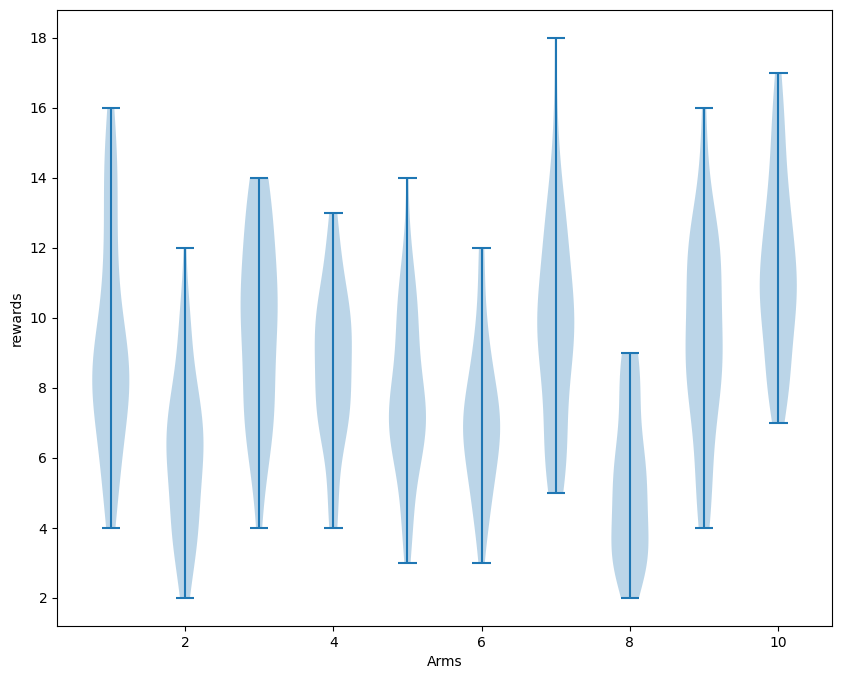

In [54]:
fig = plt.figure(figsize=(10,8))
plt.violinplot(bandits)
plt.ylabel("rewards")
plt.xlabel('Arms')
plt.show()

Algorithm 1 -- Uniform exploration

In [55]:
def uniform_exploration(bandit, T):
    K = bandit.K
    rewards = [[] for _ in range(K)]
    history = []

    for t in range(T):
        k = t % K
        r = bandit.get_arm(k)
        rewards[k].append(r)
        history.append(r)

    means_hat = [np.mean(r) if len(r) > 0 else 0 for r in rewards]
    best_arm_hat = int(np.argmax(means_hat))
    optimal_mean = bandit.optimal_mean()
    cum_rewards = np.cumsum(history)
    regret = np.arange(1, T + 1) * optimal_mean - cum_rewards
    return best_arm_hat, means_hat, rewards, history, regret


Bras optimal (réel) : 9
Bras estimé (uniform exploration) : 8


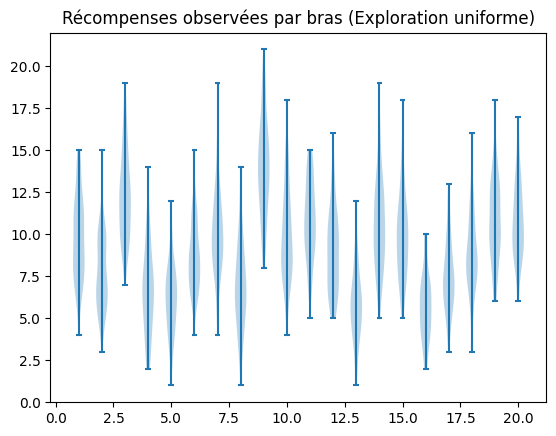

In [71]:
my_U_bandit = Bandit(K, seed=42)
best_arm_hat, means_hat, rewards, _, regret_uniform = uniform_exploration(my_U_bandit, T)
print("Bras optimal (réel) :", my_Bandit.optimal_arm())
print("Bras estimé (uniform exploration) :", best_arm_hat)
plt.violinplot(rewards)
plt.title("Récompenses observées par bras (Exploration uniforme)")
plt.show()

In [72]:
def evaluate_uniform(K, T=500, n_exp=200):
    successes = 0
    for i in range(n_exp):
        bandit = Bandit(K)  # chaque expérience = nouveau bandit
        best_real = bandit.optimal_arm()
        best_hat, _, _, _, _= uniform_exploration(bandit, T)
        if best_hat == best_real:
            successes += 1 
    return successes / n_exp
taux = evaluate_uniform(K=10, T=500, n_exp=200)
print(f"Taux de bonne identification (sur 200 expériences) : {taux:.2f}")

Taux de bonne identification (sur 200 expériences) : 0.87


K=5, T=100 → Taux = 0.87
K=5, T=500 → Taux = 0.87
K=5, T=1000 → Taux = 0.87
K=5, T=2000 → Taux = 0.88
K=10, T=100 → Taux = 0.78
K=10, T=500 → Taux = 0.86
K=10, T=1000 → Taux = 0.88
K=10, T=2000 → Taux = 0.86
K=20, T=100 → Taux = 0.60
K=20, T=500 → Taux = 0.81
K=20, T=1000 → Taux = 0.83
K=20, T=2000 → Taux = 0.86


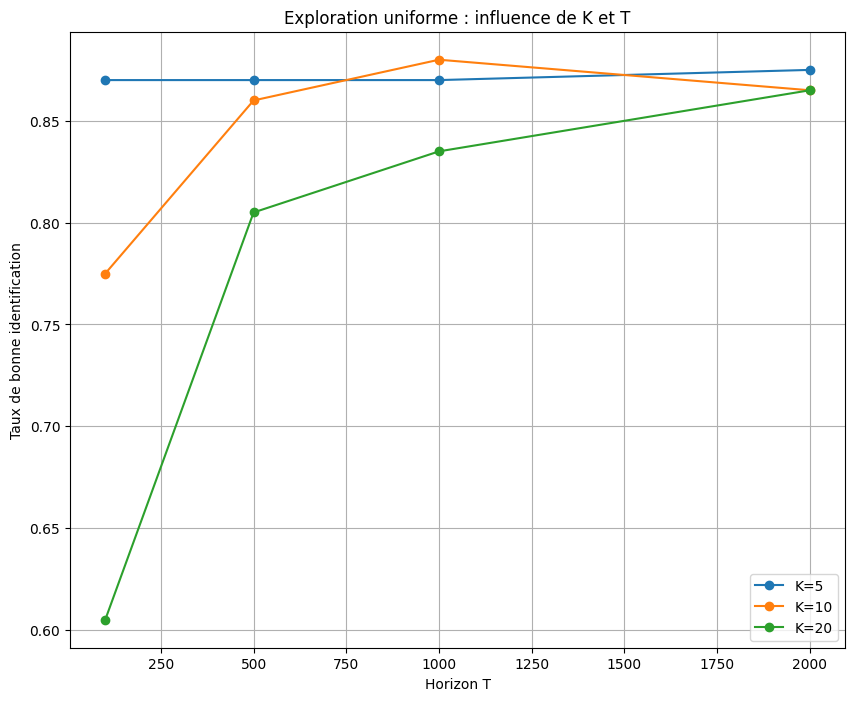

In [73]:
T_values = [100, 500, 1000, 2000]
K_values = [5, 10, 20]
n_exp = 200

plt.figure(figsize=(10,8))
for K in K_values:
    results = []
    for T in T_values:
        taux = evaluate_uniform(K, T=T, n_exp=n_exp)
        results.append(taux)
        print(f"K={K}, T={T} → Taux = {taux:.2f}")
    plt.plot(T_values, results, marker="o", label=f"K={K}")

plt.xlabel("Horizon T")
plt.ylabel("Taux de bonne identification")
plt.title("Exploration uniforme : influence de K et T")
plt.legend()
plt.grid(True)
plt.show()

Algorithm 2 -- Epsillon greedy

In [74]:

def epsilon_greedy(bandit, T=500, epsilon=0.1):
    K = bandit.K
    counts = np.zeros(K)
    values = np.zeros(K)
    rewards = []

    for t in range(T):
        if np.random.rand() < epsilon:
            k = np.random.randint(0, K)  # exploration
        else:
            k = np.argmax(values)        # exploitation

        r = bandit.get_arm(k)
        rewards.append(r)

        counts[k] += 1
        values[k] += (r - values[k]) / counts[k]
    optimal_mean = bandit.optimal_mean()
    cum_rewards = np.cumsum(rewards)
    regret = np.arange(1, T + 1) * optimal_mean - cum_rewards
    return np.array(rewards), counts, values, regret


Bras optimal : 9
Valeurs estimées : [ 8.32  5.54  9.33  8.83  8.    7.1   9.92  5.27  8.17 10.88]
Nombre de tirages : [ 19.  13.  15.  18.  12.  10. 115.  11.   6. 781.]
Récompense cumulée : 10444


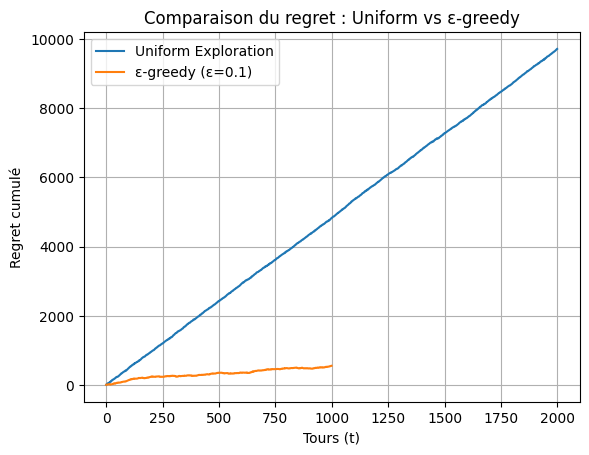

In [75]:
myBandit = Bandit(K=10, seed=42)
epsilon=0.1
rewards, counts, values,regret_eps = epsilon_greedy(myBandit, T=1000, epsilon=epsilon)

print("Bras optimal :", myBandit.optimal_arm())
print("Valeurs estimées :", values.round(2))
print("Nombre de tirages :", counts)
print("Récompense cumulée :", rewards.sum())
plt.plot(regret_uniform, label="Uniform Exploration")
plt.plot(regret_eps, label=f"ε-greedy (ε={epsilon})")
plt.xlabel("Tours (t)")
plt.ylabel("Regret cumulé")
plt.title("Comparaison du regret : Uniform vs ε-greedy")
plt.legend()
plt.grid(True)
plt.show()